<module 'matplotlib.pyplot' from '/Users/vanhaoon/Downloads/CECS451/Lab/Assignment5/virenv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

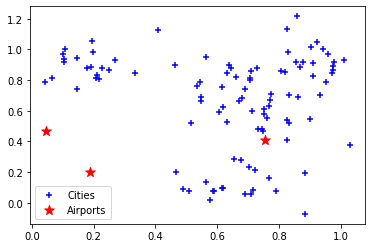

In [1]:
import random
import numpy as np
import math

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [2]:
def distance(airport, city):
    return math.sqrt((airport[0] - city[0])**2 + (airport[1] - city[1])**2)

def closestCities(airports, cities):
    citySets = [[], [], []]
    for city in cities:
        closestAirportIndex = 0    
        minDist = distance(airports[0], city)
        
        for i, airport in enumerate(airports[1:]):
            currDist = distance(airport, city)
            currAirportIndex = i + 1
            if currDist < minDist:
                closestAirportIndex = currAirportIndex
                minDist = currDist
                
        citySets[closestAirportIndex].append(city)
    return citySets 

In [3]:
def objectiveFunc(state, citySets):
    sum = 0
    for i in range(len(citySets)):
        for city in citySets[i]:
            stateIndex = i*2
            sum += (state[stateIndex] - city[0])**2 + (state[stateIndex+1] - city[1])**2
    return sum

In [4]:
def calcGrad(airports, citySets):
    grad = [] * len(airports) * 2
    for i in range(len(airports)):
        dfdx = 0
        dfdy = 0
        for city in citySets[i]:
            dfdx += (airports[i][0] - city[0])
            dfdy += (airports[i][1] - city[1])
        grad.append(2 * dfdx)
        grad.append(2 * dfdy)
    return grad 

In [5]:
def gradDescent(airports, cities):
    state = []
    for pair in airports:
        state.append(pair[0])
        state.append(pair[1])
    
    delta = .0001
    alpha = .005
    percentChange = 1
    
    citySets = closestCities(airports, cities)
  
    objValues = []
    objValues.append(objectiveFunc(state, citySets))
    
    while percentChange > delta:
        # Compute Gradient
        gradVector = calcGrad(airports, citySets)
        # Move state
        state = state - np.multiply(alpha, gradVector)
        
        # Get the new airports
        newAirs = []
        for i in range(0, len(state), 2):
            x = state[i]
            y = state[i+1]
            newAirs.append((x,y))

        airports = newAirs
        
        # Calculate new city set
        citySets = closestCities(airports, cities)
        
        # Store object function value
        objValues.append(objectiveFunc(state, citySets))
        
        currObjVal = objValues[-1]
        prevObjVal = objValues[-2]
        percentChange = abs((prevObjVal - currObjVal) / prevObjVal)
    
    return objValues, airports
        
        

In [6]:
import matplotlib.pyplot as plt

def plot(objValues):
    plt.scatter(list(range(0,len(objValues))), objValues)

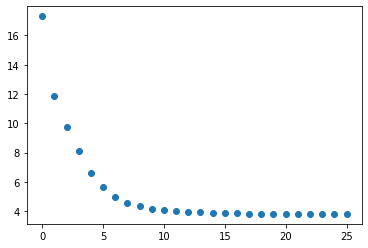

In [7]:
objValues, newAirports = gradDescent(airports, cities)
plot(objValues)

<module 'matplotlib.pyplot' from '/Users/vanhaoon/Downloads/CECS451/Lab/Assignment5/virenv/lib/python3.7/site-packages/matplotlib/pyplot.py'>

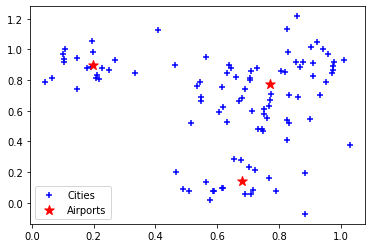

In [8]:
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*newAirports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt